The first step, in order to the link the neutrino mass eigenstates and the neutrino flavour eigenstates, was to construct the PMNS matrix (The Leptonic mixing matrix), containing the 3 mixing angles and the cp violating complex phase angle.

$$|{\nu_\alpha}> = \sum_{k} U_{\alpha k}^{*} |{\nu_k}>$$

where:

$|{\nu_\alpha}>$ represents the neutrino flavour eigenstates (where $\alpha = e,\mu,\tau$),

$|{\nu_k}>$ represents the neutrino mass eigenstates (where $k = 1,2,3$),

and U represents the PMNS Matrix

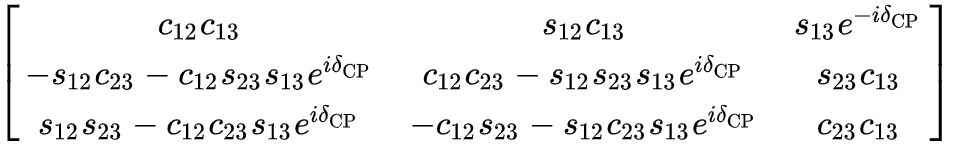

In [5]:
#import an image of the PMNS Matrix for reference to see what the PMNS matrix looks like.
from PIL import Image
PMNS_matrix_image = Image.open('PMNSmatrix.png')
PMNS_matrix_image

Where c$_{ij}$ = cosθ$_{ij}$ and s$_{ij}$ = sinθ$_{ij}$

And $\theta_{12}$ = 33.44$^{\circ}$, $\theta_{23}$ = 49.0$^{\circ}$,  $\theta_{13}$ = 8.57$^{\circ}$ and $\delta_{cp}$ = 195$^{\circ}$ using the latest NuFIT 2020 Oscillation data

In [33]:
import numpy as np

angles = [195, 33.44, 49 ,8.57]  #these are the 3 mixing angles and the single complex phase angle in degrees 
radian_values = np.radians(angles) #conversion to radians 

#delta_cp = 0
delta_cp = np.radians(90)
#delta_cp = radian_values[0] #explicity writing out the angles in radians and assigning them variable names 
theta_12 = radian_values[1]
theta_23 = radian_values[2]
theta_13 = radian_values[3]
#print(theta_13)

c_12 = np.cos(theta_12)  #calculating and assigning variable names to the terms we will need in the PMNS Matrix
c_23 = np.cos(theta_23)
c_13 = np.cos(theta_13)
s_12 = np.sin(theta_12)
s_23 = np.sin(theta_23)
s_13 = np.sin(theta_13)

delta_cp_0 = 0   #This sets delta-cp to 0. Setting delta-cp = 0 can be used as a check for my code,
#where this condition means neutrinos and anti-neutrinos have the same oscillation probabilities.

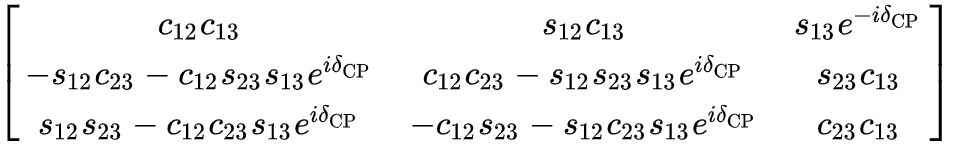

In [34]:
#For reference in order to easily construct the matrix in Python
from PIL import Image
PMNS_matrix_image = Image.open('PMNSmatrix.png')
PMNS_matrix_image

In [35]:
#Constructing the PMNS matrix, using the 3 mixing angles and the single complex phase angle. 

PMNS_matrix = np.array([[c_12*c_13, s_12*c_13 , s_13*np.exp(-1j*delta_cp)],
[(-s_12*c_23) - (c_12*s_23*s_13*(np.exp(1j*delta_cp))),(c_12*c_23) - s_12*s_23*s_13*np.exp(1j*delta_cp), s_23*c_13],
[(s_12*s_23) - (c_12*c_23*s_13*np.exp(1j*delta_cp)), (-c_12*s_23) - s_12*c_23*s_13*np.exp(1j*delta_cp), c_23*c_13]])

print(np.conj(PMNS_matrix))
print('\n')
print(np.exp(1j*delta_cp))

[[ 8.25146186e-01-0.j          5.44910564e-01-0.j
   9.12469704e-18+0.14901761j]
 [-3.61530145e-01+0.09384794j  5.47457216e-01+0.06197536j
   7.46282902e-01-0.j        ]
 [ 4.15892857e-01+0.08158077j -6.29777486e-01+0.05387436j
   6.48733829e-01-0.j        ]]


(6.123233995736766e-17+1j)


Above is the PMNS matrix when all the angles are included. Here j represents 'i' the imaginary number. So we have included all the real and imaginary parts 

In [11]:
U_ei_conjugate = np.conj(PMNS_matrix[1,:])
U_e = PMNS_matrix[1,:]
result = np.dot(U_ei_conjugate,U_e)
result.real
#The result of the dot product of one row of the matrix with the same row conjugated, should equal 1

1.0

# Part 1: Phasor Diagram First attempts with No Time Evolution
These are the first attempts at creating a plot of the phasor diagram.
For instance, taking the first row (i.e the electron flavour row), the resulting plot will contain three vectors (which are the contributions of the 3 mass eigenstates: $\nu_i$ where i=1,2,3) as defined from the PMNS Matrix. I have decided to represent $\nu_1$ by the colour blue, $\nu_2$ in red and $\nu_3$ in green. I will continue to use this representation throughout.

In [19]:
import matplotlib.pyplot as plt 


def phasor_diagram(num):
    '''
    Args:
        num: This is row number of the PMNS matrix 
             1 corresponds to the 1st row (electron row)
             2 corresponds to the 2nd row (muon row)
             3 corresponds to the 3rd row (tau row)
        
    '''
    #Defining a function which takes in row number as an argument and returns that row of the PMNS matrix
    def PMNSmatrix(num):
        if num in [1,2,3]: 
            return PMNS_matrix[num - 1,:]
        else:
            print('Please enter either 1,2 or 3. This corresponds to the electron, muon or tau row of the'
              ' PMNS matrix respectively')

    a = np.conj(PMNSmatrix(num))
    
    for i in range(len(a)):
        #i.e for each of the three neutrino eigenmass elements of a matrix row, plot each element on the complex plane
        plt.plot(a[i].real, a[i].imag, marker = 'o')
    
    x1,y1 = [0,a[0].real], [0, a[0].imag] 
    x2,y2 = [0,a[1].real], [0, a[1].imag]
    x3,y3 = [0,a[2].real], [0, a[2].imag]
    #This creates tuples. In this case these are the coordinates of the real and imaginary 
    #components of each element, which we'll need to draw lines connecting the origin to each element/marker
     
    plt.axhline(y=0,color='black') #introduces axis lines (on x=0 and y=0) that are visible
    plt.axvline(x=0, color='black')
    
    #Draw the hypotenuse (line connecting the origin to each eigenmasselement (marker)). 
    #This line represents each eigenmass vector.
    plt.plot(x1,y1,'b') 
    plt.plot(x2,y2,'r') 
    plt.plot(x3,y3,'g') 
    
    limit=np.max(np.ceil(np.absolute(a))) # set limits for axis so we can see the full extent of the phasor diagram

    #If statements to output the correct title depending on the input
    if num == 1:
        plt.title('U$_{e i}$', fontsize=15)
    if num == 2:
        plt.title('U$_{\\mu i}$', fontsize=15)
    if num == 3:
        plt.title('U$_{\\tau i}$', fontsize=15)
    
    plt.ylabel('Imaginary', fontsize=10) #including axis labels
    plt.xlabel('Real', fontsize=10)
    plt.axis('scaled')
    plt.xlim((-limit,limit))
    plt.ylim((-limit,limit))
    plt.grid()
    plt.legend('123')
    plt.show()

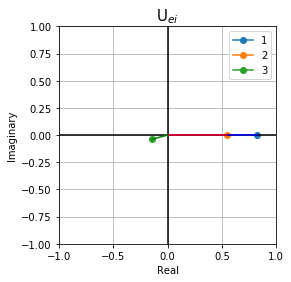

In [20]:
#use the function to plot the 3 vectors from the 1st row of the matrix i.e electron contribution
phasor_diagram(1) 

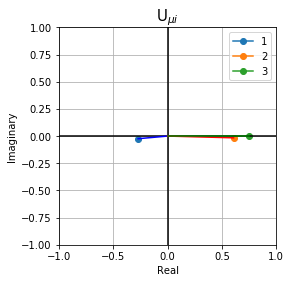

In [21]:
#use the function to plot the 3 vectors from the 2nd row of the matrix i.e muon contribution
phasor_diagram(2)

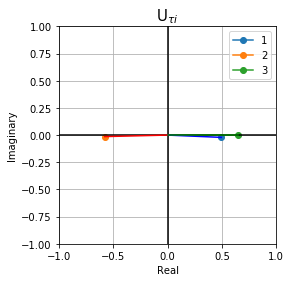

In [22]:
#use the function to plot the 3 vectors from the 3rd row of the matrix i.e tau contribution
phasor_diagram(3)

# Part 2: Producing Time Evolved Phasor Diagrams

We can think of each U$_{\alpha i}$ (i.e each arrow above) as a fraction. The mass determines how fast these arrows rotate, or rather how quickly these fractions evolve over time. We will keep U$_{\alpha 1}$ fixed (blue) whilst the other two spin in reference to it, therefore the mass differences will determine how fast the two other arrows rotate.

The arrows/fractions will evolve by a factor e$^{ i \omega_{ji}t}$, where $\omega_{ji} = \frac{\Delta m_{ji}^2c}{4E}$. We therefore see that this factor depends only on the variables: time, t, and Neutrino Energy, E. The mass-squared differences, $\Delta m_{ji}^2$ and speed of light, c, are all constants.

In natural units, c=1. Therefore, we can write: $\omega_{ji} = \frac{\Delta m_{ji}^2}{4E}$. We can choose the energy of the Neutrino, E, for now as this only affects the rate of spinning. 

Using he current best-fit values from NuFIT.org: $\Delta m_{21}^2$ = $7.42 \times{10^{-5}}$ eV$^2$ and $\Delta m_{31}^2$ = $2.514 \times{10^{-3}}$ eV$^2$

In [11]:
#Initialising the mass squared differences
m_21 = 7.42e-5
m_31 = 2.514e-3

#defining a function that when taking in a mass squared difference and an energy, will return an angular frequency w
def angular_frequency(m,E):
    return m/(4*E)

w_21 = angular_frequency(m_21, 1e-4)
w_31 = angular_frequency(m_31, 1e-4)
#print(w_21)

t1=((2*np.pi)/w_21) # This is the period for one full circle
t2=((2*np.pi)/w_31)
print(t1)
print(t2) #Printing out the period for one full rotation
print('\n')
rate_21 = np.exp(1j*w_21*0.5)
rate_31 = np.exp(1j*w_31*0.5)
print(rate_21)
print(rate_31)

33.8716189066285
0.9997112660588044


(0.9957018013693334+0.09261707590862794j)
(-0.9999995883612742-0.0009073462857071891j)


From this result, we see that the $\nu_3$ (green arrow) evolves/spins roughly 30x faster than the $\nu_2$ (red arrow)

In [8]:
#First attempt at making a function that will return an evolved phasor diagram given a time input

import matplotlib.pyplot as plt 
import numpy as np

def phasor_diagram_evolver(row_num, m_21, m_31, E, t):
    
    '''
    Args:
        row_num: This is row number of the PMNS matrix 
                 1 corresponds to the 1st row (electron)
                 2 corresponds to the 2nd row (muon)
                 3 corresponds to the 3rd row (tau)
        m_21: mass squared difference (21)
        m_31: mass squared difference (31)
        E: Energy of Neutrino 
        t: Time

    '''
    #define a function that defines the phase factor evolution
    def phase_factor(m_ji,E,t):
        '''
        Args:
            m_ji = mass squared difference
            E = Energy of Neutrino
            t = Time
        '''
        return np.exp(-1j*(m_ji/(4*E))*t)
    
    rate_21 = phase_factor(m_21, E, t) #The amount the v_2 arrow evolves by, with reference to v_1, given E and t
    rate_31 = phase_factor(m_31, E, t) #The amount the v_3 arrow evolves by, with reference to v_1, given E and t
    
    def PMNSmatrix(row_num):
        if row_num in [1,2,3]: 
            return PMNS_matrix[row_num - 1,:]
        else:
            print('Please enter either 1,2 or 3. This corresponds to the electron, muon or tau row of the'
              ' PMNS matrix respectively')
            
    a = np.conj(PMNSmatrix(row_num)) #This uses the above function to call the choosen matrix row that we will do work on
    
    plt.axhline(y=0,color='white', linewidth = 1) #intoduce axis lines that are visible
    plt.axvline(x=0, color='white', linewidth = 1)
    
    #Below is saying that for each of the three neutrino mass elements of a matrix row, plot a point using the
    #real part as the x-coordinate and the imaginary part as the y-coordinate, and then also plot a line
    #from the origin to that point.
    for i in range(len(a)):
    
        if i == 0:
            plt.plot(a[0].real, a[0].imag, marker = 'o', color = 'b', label = '$\u03BD_1$')
            #Plots the marker at coordinate: (real part, imaginary part)
            x1,y1 = [0,a[0].real], [0, a[0].imag]
            plt.plot(x1,y1,'b', linewidth=2) 
            #Draws the hypotenuse (i.e draw a line from the origin to the marker)
            
        if i == 1:
            x = a[1]*rate_21 #move this arrow forward by a certain amount, defined by phase_factor function
            plt.plot(x.real, x.imag, marker = 'o', color = 'r', label = '$\u03BD_2$')
            x2,y2 = [0,x.real], [0, x.imag]
            plt.plot(x2,y2, 'r', linewidth=2) 
            #print(x.real) #can be used to give readouts for the value of real or imag part of v_2.
            
        if i == 2:
            y = a[2]*rate_31 #move this arrow forward by a certain amount, defined by phase_factor function
            plt.plot(y.real, y.imag, marker = 'o', color  = 'g', label = '$\u03BD_3$')
            x3,y3 = [0,y.real], [0, y.imag]
            plt.plot(x3,y3, 'g', linewidth=2) 
        
    
    limit=np.max(np.ceil(np.absolute(a))) # set limits for axis so we can see the full range of angles
    plt.xlim((-limit,limit))
    plt.ylim((-limit,limit))
    
    #If statements to output the correct title depending on which row we choose to input
    if row_num == 1:
        plt.title('Phasor diagram: U$_{e i}$', fontsize=15)
    if row_num == 2:
        plt.title('Phasor diagram: U$_{\\mu i}$', fontsize=15)
    if row_num == 3:
        plt.title('Phasor diagram: U$_{\\tau i}$', fontsize=15)
    
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.legend()
    plt.tight_layout()  #call use this is there is any padding issues around the plot
    plt.style.use('dark_background')
    plt.show()

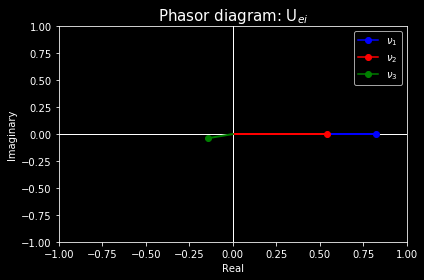

In [10]:
phasor_diagram_evolver(row_num = 1, m_21 = 7.42e-5, m_31 = 2.514e-3, E = 1e-4 , t = 0)
#Calling the function for the first row (initailly electron row) and inputting the necessary parameters
#Can change t to see the evolution

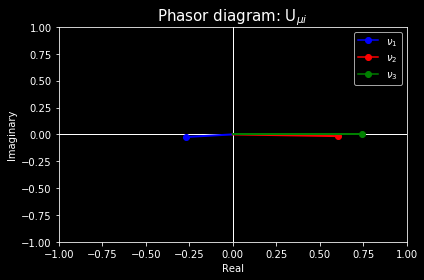

In [12]:
phasor_diagram_evolver(row_num = 2, m_21 = 7.42e-5, m_31 = 2.514e-3, E = 1e-4 , t = 0)
#Calling the function for the second row (initailly muon row) 

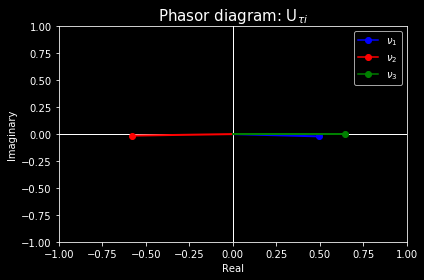

In [14]:
phasor_diagram_evolver(row_num = 3, m_21 = 7.42e-5, m_31 = 2.514e-3, E = 1e-4 , t = 0)
#Calling the function for the third row (initailly tau row) 

# Part 3: Producing Time Evolved Phasor Diagrams using L instead of t

The arrows/fractions will evolve by a factor e$^{-i \omega_{ji}t}$ as discussed earlier. We could alternatively look at how the arrows evolved by probing the length scale. 

$$|{\nu_\alpha}> = \sum_{k} U_{\alpha k}^{*} |{\nu_k}>$$

where $\alpha = e, \mu, \tau$ and $k =1,2,3$

The amplitude for a neutrino to change from $\nu_\alpha$ to $\nu_\beta$ is:
$$ Amp(\nu_\alpha (0,0) -> \nu_\beta (x,t)) = \sum_{k} U_{\alpha k}^{*} U_{\beta k} e^{-i\phi_k} $$
where i represents the complex number and $\phi_k = m^2_k\frac{L}{2E}$ is the phase.

The mass eigenstates $\nu_k$ evolve by a phase factor e$^{-i\phi_k}$. We will look at how $\nu_2$ and $\nu_3$ evolve with respect to $\nu_1$ as they travel over a distance L. This is equivalent to keeping $\nu_1$ fixed while the other two mass eigenstates $\nu_2$ and $\nu_3$ evolve with reference to it. Therefore, a phase difference occurs between $\nu_2$ and $\nu_1$, as well as between $\nu_3$ and $\nu_1$.

For $\nu_1$:  $\frac{e^{-i \phi_1}}{e^{-i \phi_1}}$ = 1

For $\nu_2$:  $\frac{e^{-i \phi_2}}{e^{-i \phi_1}}$ = $e^{-i(\phi_2 - \phi_1)}$ = $e^{-i\phi_{21}}$  = $e^{-i \Delta m^2_{21}\frac{L}{2E}}$

For $\nu_3$:  $\frac{e^{-i \phi_3}}{e^{-i \phi_1}}$ = $e^{-i(\phi_3 - \phi_1)}$ = $e^{-i\phi_{31}}$ =  $e^{-i \Delta m^2_{31}\frac{L}{2E}}$

If we include the factors of $\hbar$ and $c$ that have been set equal to 1 so far, we obtain a form which is convenient to plug in oscillation parameters: $$\phi_{jk} = \Delta m^2_{jk}\frac{L}{2E} = \Delta m^2_{jk}\frac{c^3L}{2\hbar E} \approx 2.54\frac{\Delta m_{jk}^2 L}{E} \frac{[eV^2][km]}{[GeV]}$$

where $\Delta m_{jk}^2$ are the mass squared differences in eV$^2$ with $j > k$ for normal mass ordering. L is distance travelled by the neutrino in km, and E is the neutrino energy in GeV.

## Readouts of the percentage and phase of the evolved neutrino flavours 

### Neutrino Percentage
This part is to show how we calculate the probability of detecting a certain neutrino flavour from the original neutrino flavour (i.e from what we started with) after the neutrino has travelled some distance L.


The transition amplitude for detecting a neutrino of flavour $\beta$ at space-time point (x,t), given that we started off we a neutrino falvour $\alpha$ at space-time point (0,0), is given by:
$$ Amp(\nu_\alpha (0,0)  -> \nu_\beta (x,t)) = \sum_{k} U_{\alpha k}^{*} U_{\beta k} e^{-i\phi_k} $$

Therefore, to find the probabilty for detecting this neutrino flavour $\beta$ we take the modulus squared of the transition amplitude above, as given by:
$$ P(\nu_\alpha (0,0)  -> \nu_\beta (x,t)) =  | \sum_{k} U_{\alpha k}^{*} U_{\beta i} e^{-i\phi_{jk}} | ^2 $$


    
### Neutrino Phase
$$ Amp(\nu_\alpha (0,0)  -> \nu_\beta (x,t)) = \sum_{k} U_{\alpha k}^{*} U_{\beta k} e^{-i\phi_{jk}} $$

The RHS is a complex number (of the form x+iy) which contains the phase, $\gamma$, of the flavour component with respect to the original flavour component.  This complex number can also be written as $e^{i\gamma}$ = isin$\gamma$ + cos$\gamma$. The phase, $\gamma$ can then be calculated by $\gamma$ = arctan($\frac{y}{x}$)

In [20]:
#First attempt at creating such a function 

m_21 = 7.42e-5
m_31 = 2.514e-3

def angular_frequency2(m_ji,E,L):
    '''
    args:
        m_ji: Mass squared difference in eV^2
        E = Neutrino Energy in GeV
        L = Distance travelled by neutrino in km
    '''
    return (2.54*m_ji*L)/E

w_21 = angular_frequency2(m_21, 0.6, 20000)
w_31 = angular_frequency2(m_31, 0.6, 20000)
print(w_21)
print(w_31)

t = (w_21/(2*np.pi))# This is the period for one full circle
t1 = (w_31/(2*np.pi))
print(t)
print(t1)

6.2822666666666676
212.852
0.9998537938214446
33.87644794699611


In [36]:
import matplotlib.pyplot as plt 
import math
import numpy as np

def phasor_diagram_evolver_trial(row_num, m_21, m_31, E, L):
    
    '''
    Args:
        a: A row of the PMNS Matrix (in the form PMNS_matrix[0,:] - i.e calling the PMNS_matrix defined earlier)
        m_21: mass squared difference (21)
        m_31: mass squared difference (31)
        E: Energy of Neutrino 
        L: Distance travelled by neutrino

    '''
    
    def phase_factor2(m_ji,E,L):
        '''
        args:
            m_ji: Mass squared difference in eV^2
            E = Neutrino Energy in GeV
            L = Distance travelled by neutrino in km
        '''
        return np.exp(-1j*1.27*2*m_ji*L/E) 
    #-i for clockwise rotation (neutrino), +i for anti-clockwise (anti-neutrino)
    
    rate_21 = phase_factor2(m_21, E, L) #The amount the v_2 arrow evolves by, with reference to v_1, given E and L
    rate_31 = phase_factor2(m_31, E, L) #The amount the v_3 arrow evolves by, with reference to v_1, given E and L
    
    
    def PMNSmatrix(row_num):
        if row_num in [1,2,3]: 
            return PMNS_matrix[row_num - 1,:]
        else:
            print('Please enter either 1,2 or 3. This corresponds to the electron, muon or tau row of the'
              ' PMNS matrix respectively')
    
    a = np.conj(PMNSmatrix(row_num)) #This uses the above function to call the choosen matrix row that we will do work on
    
    plt.style.use('dark_background')
    plt.axhline(y=0,color='white') #intoduce axis lines that are visible
    plt.axvline(x=0, color='white')
    
    #Below is saying that for each of the three neutrino mass elements of a matrix row, plot a point using the
    #real part as the x-coordinate and the imaginary part as the y-coordinate, and then also plot a line
    #from the origin to that element's point.
    for i in range(len(a)):
        if i == 0:
            plt.plot(a[0].real, a[0].imag, marker = 'o', color = 'b', label = '$\u03BD_1$')
            #Plots the marker at coordinate: (real part, imaginary part)
            x1,y1 = [0,a[0].real], [0, a[0].imag]
            plt.plot(x1,y1,'b',linewidth=2)
            #Draws the hypotenuse (i.e draws a line from the origin to the marker)
            
        if i == 1:
            x = a[1]*rate_21 #move this arrow forward by a certain amount, defined by phase_factor2 function
            plt.plot(x.real, x.imag, marker = 'o', color = 'r', label = '$\u03BD_2$')
            x2,y2 = [0,x.real], [0, x.imag]
            plt.plot(x2,y2, 'r', linewidth=2) 
            #print(x.real) #can be used to give readouts for the value of real or imag part of v_2.
            
        if i == 2:
            y = a[2]*rate_31 #move this arrow forward by a certain amount, defined by phase_factor2 function
            plt.plot(y.real, y.imag, marker = 'o', color  = 'g', label = '$\u03BD_3$')
            x3,y3 = [0,y.real], [0, y.imag]
            plt.plot(x3,y3,'g',linewidth=2) 
    
    
    #Phase and neutrino percentage readouts
    a_new = np.array([[a[0]],[x],[y]])   
    for num in [1,2,3]:
        U_bk = PMNSmatrix(num)
        flavour_composition = float((np.absolute(np.dot(U_bk,a_new)))**2)*100
        phase = np.conj(np.dot(U_bk,a_new))
        x_phase=phase.real
        #print(x_phase)
        y_phase=phase.imag
        #print(y_phase)
        gamma = math.atan2(y_phase,x_phase)
        gamma_deg = np.degrees(gamma)
        if num == 1:
            print('Electron neutrino percentage: {r:1.2f}%'.format(r=flavour_composition))
            print('Electron Phase: {r:1.2f}'.format(r=gamma_deg))
        if num == 2:
            print('Muon neutrino percentage: {r:1.2f}%'.format(r=flavour_composition))
            print('Muon Phase: {r:1.2f}'.format(r=gamma_deg))
        if num == 3:
            print('Tau neutrino percentage: {r:1.2f}%'.format(r=flavour_composition))
            print('Tau Phase: {r:1.2f}'.format(r=gamma_deg))
            
    
    #plt.axis('square')
    limit=np.max(np.ceil(np.absolute(a))) # set limits for axis so we can see the full range of angles
    plt.xlim((-limit,limit))
    plt.ylim((-limit,limit))
    
    #If statements to output the correct title depending on which row we choose to input
    if row_num == 1:
        plt.title('Phasor diagram: U$_{e i}$', fontsize=15)
    if row_num == 2:
        plt.title('Phasor diagram: U$_{\\mu i}$', fontsize=15)
    if row_num == 3:
        plt.title('Phasor diagram: U$_{\\tau i}$', fontsize=15)
        
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.legend()
    plt.tight_layout()

Electron neutrino percentage: 0.00%
Electron Phase: -63.86
Muon neutrino percentage: 100.00%
Muon Phase: -0.00
Tau neutrino percentage: 0.00%
Tau Phase: 10.30


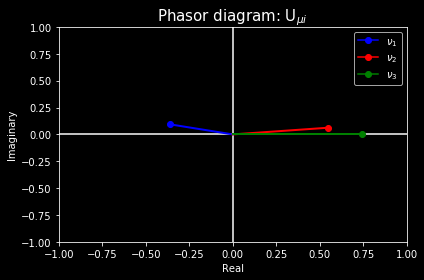

In [42]:
phasor_diagram_evolver_trial(row_num = 2, m_21 = 7.42e-5, m_31 = 2.514e-3, E = 0.6 , L = 0)

Electron neutrino percentage: 100.00%
Electron Phase: -0.00
Muon neutrino percentage: 0.00%
Muon Phase: -0.00
Tau neutrino percentage: 0.00%
Tau Phase: -180.00


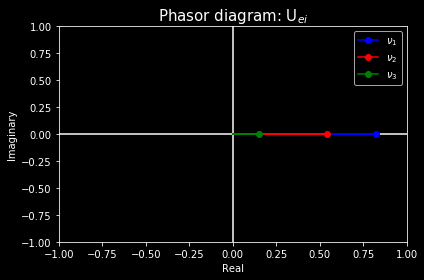

In [27]:
phasor_diagram_evolver_trial(row_num = 1, m_21 = 7.42e-5, m_31 = 2.514e-3, E = 0.6 , L = 0)

Electron neutrino percentage: 15.89%
Electron Phase: -0.45
Muon neutrino percentage: 42.49%
Muon Phase: -171.22
Tau neutrino percentage: 41.63%
Tau Phase: -4.01


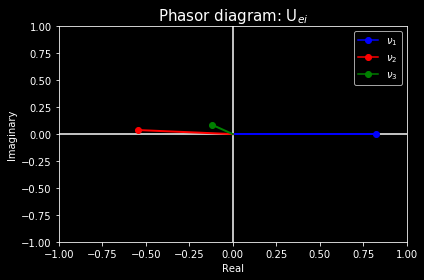

In [24]:
phasor_diagram_evolver_trial(row_num = 1, m_21 = 7.42e-5, m_31 = 2.514e-3, E = 0.6 , L = -1180*110)

# Plotting the Neutrino Phases against Distance Travelled

### Part 1: First make a plot of each of the phases at a particular L i.e at a single point at given L

In [26]:
import matplotlib.pyplot as plt 
import math

def phases1(row_num, m_21, m_31, E, L):
    
    '''
    Args:
        a: A row of the PMNS Matrix (in the form PMNS_matrix[0,:] - i.e calling the PMNS_matrix defined earlier)
        m_21: mass squared difference (21)
        m_31: mass squared difference (31)
        E: Energy of Neutrino 
        L: Distance travelled by neutrino

    '''
    
    def phase_factor2(m_ji,E,L):
        '''
        args:
            m_ji: Mass squared difference in eV^2
            E = Neutrino Energy in GeV
            L = Distance travelled by neutrino in km
        '''

        return np.exp(-1j*1.27*2*m_ji*L/E) #-i for clockwise rotation, +i for anti-clockwise
    
    rate_21 = phase_factor2(m_21, E, L) #The amount the v_2 arrow evolves by, with reference to v_1, given E and t
    rate_31 = phase_factor2(m_31, E, L) #The amount the v_3 arrow evolves by, with reference to v_1, given E and t
    
    
    def PMNSmatrix(row_num):
        if row_num in [1,2,3]: 
            return PMNS_matrix[row_num - 1,:]
        else:
            print('Please enter either 1,2 or 3. This corresponds to the electron, muon or tau row of the'
              ' PMNS matrix respectively')
            #Fix this to make you return to the top of the loop until a correct input is choosen
    
    a = np.conj(PMNSmatrix(row_num)) #This uses the above function to call the choosen matrix row that we will do work on
    x = a[1]*rate_21
    y = a[2]*rate_31

    a_new = np.array([[a[0]],[x],[y]])   
    for num in [1,2,3]:
        U_bk = PMNSmatrix(num)
        flavour_composition = float((np.absolute(np.dot(U_bk,a_new)))**2)*100
        phase = np.conj(np.dot(U_bk,a_new))
        x_phase=phase.real
        y_phase=phase.imag
        gamma = math.atan2(y_phase,x_phase)
        gamma_deg = np.degrees(gamma)
        if num == 1:
            print('Electron neutrino percentage: {r:1.2f}%'.format(r=flavour_composition))
            print('Electron Phase: {r:1.2f}'.format(r=gamma_deg))
            plt.plot(L,gamma_deg, marker='o', color = 'b')
        if num == 2:
            print('Muon neutrino percentage: {r:1.2f}%'.format(r=flavour_composition))
            print('Muon Phase: {r:1.2f}'.format(r=gamma_deg))
            plt.plot(L,gamma_deg, marker = 'o', color = 'r')
        if num == 3:
            print('Tau neutrino percentage: {r:1.2f}%'.format(r=flavour_composition))
            print('Tau Phase: {r:1.2f}'.format(r=gamma_deg))
            plt.plot(L,gamma_deg, marker = 'o', color = 'g')


    #plt.axis('square')
    limit=180 # set limits for axis so we can see the full range of angles
    plt.ylim((-limit,limit))
    
    #If statements to output the correct title depending on which row we choose to input
    if row_num == 1:
        plt.title('Phasor diagram: U$_{e i}$', fontsize=15)
    if row_num == 2:
        plt.title('Phasor diagram: U$_{\\mu i}$', fontsize=15)
    if row_num == 3:
        plt.title('Phasor diagram: U$_{\\tau i}$', fontsize=15)
    
    plt.style.use('dark_background')
    plt.ylabel('Phase')
    plt.xlabel('Distance travelled (km)')
    plt.tight_layout()

Electron neutrino percentage: 100.00%
Electron Phase: 0.02
Muon neutrino percentage: 0.00%
Muon Phase: -105.95
Tau neutrino percentage: 0.00%
Tau Phase: -103.30


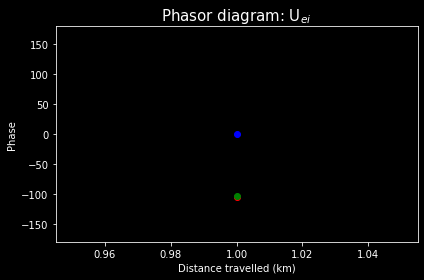

In [30]:
phases1(row_num = 1, m_21 = 7.42e-5, m_31 = 2.514e-3, E = 0.6 , L = 1)

### Part 2: Make a plot of each of the varying Neutrino flavour phases over a certain distance L

In [33]:
import matplotlib.pyplot as plt 
import math

def phases(row_num, m_21, m_31, E, Length):
    
    '''
    Args:
        a: A row of the PMNS Matrix (in the form PMNS_matrix[0,:] - i.e calling the PMNS_matrix defined earlier)
        m_21: mass squared difference (21)
        m_31: mass squared difference (31)
        E: Energy of Neutrino 
        L: Distance travelled by neutrino

    '''
    L = np.arange(0,Length,10)
    #L = np.linspace(0, Length, 5000)
    
    def phase_factor2(m_ji,E):
        '''
        args:
            m_ji: Mass squared difference in eV^2
            E = Neutrino Energy in GeV
            L = Distance travelled by neutrino in km
        '''
        L
        return np.exp(-1j*1.27*2*m_ji*L/E) #-i for clockwise rotation, +i for anti-clockwise
    
    rate_21 = phase_factor2(m_21, E) #The amount the v_2 arrow evolves by, with reference to v_1, given E and t
    rate_31 = phase_factor2(m_31, E) 
    
    #print(rate_21)
    #print(rate_31)
    
    def PMNSmatrix(row_num):
        if row_num in [1,2,3]: 
            return PMNS_matrix[row_num - 1,:]
        else:
            print('Please enter either 1,2 or 3. This corresponds to the electron, muon or tau row of the'
              ' PMNS matrix respectively')
            #Fix this to make you return to the top of the loop until a correct input is choosen
    
    a = np.conj(PMNSmatrix(row_num)) #This uses the above function to call the choosen matrix row that we will do work on
    x = a[1]*rate_21
    y = a[2]*rate_31
    
    x = np.delete(x,0) #deletes the first element in the array
    y = np.delete(y,0)
    
    L = np.delete(L,0) #deletes the first element in the array
    
    phases_list_electron=[]
    phases_list_muon=[]
    phases_list_tau=[]
    
    
    for num in [1,2,3]:
        U_bk = PMNSmatrix(num)

        for i in range(len(x)):
            a_new = np.array([[a[0]],[x[i]],[y[i]]])  
            phase = np.dot(U_bk,a_new)
            x_phase=phase.real
            y_phase=phase.imag
            gamma = math.atan2(y_phase,x_phase)
            gamma_deg = np.degrees(gamma)

            if num == 1:
                phases_list_electron.append(gamma_deg)
            if num == 2:
                phases_list_muon.append(gamma_deg)
            if num == 3:
                phases_list_tau.append(gamma_deg)
    
    
    limit=180 # set limits for axis so we can see the full range of angles
    plt.ylim((-limit,limit))
    plt.plot(L, phases_list_electron, color = 'lime', lw = 1.5, label = 'electron phase')
    plt.plot(L, phases_list_muon, color = 'aqua', lw = 1.5, label = 'muon phase')
    plt.plot(L, phases_list_tau, color = 'magenta', lw = 1.5, label = 'tau_phase')
    plt.ylabel('phase (\u00b0)')
    plt.xlabel('Distance travelled (km)')
    plt.style.use('dark_background')
    plt.legend() 

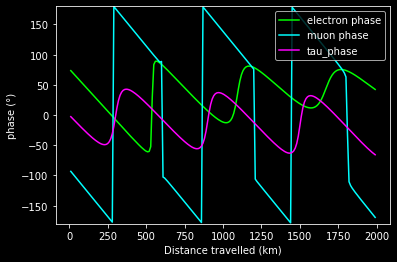

In [34]:
#Example for how the phases evolve over a distance of 1000km for a initial electron neutrino
phases(row_num = 3, m_21 = 7.42e-5, m_31 = 2.514e-3, E = 0.6 , Length = 2000)

### Part 3: Neutrino flavour percentage

In [8]:
import matplotlib.pyplot as plt 
import math

def percentages1(row_num, m_21, m_31, E, Length):
    
    '''
    Args:
        a: A row of the PMNS Matrix (in the form PMNS_matrix[0,:] - i.e calling the PMNS_matrix defined earlier)
        m_21: mass squared difference (21)
        m_31: mass squared difference (31)
        E: Energy of Neutrino 
        L: Distance travelled by neutrino

    '''
    L = np.arange(0,Length,10)
    #L = np.linspace(0, Length, 5000)
    
    def phase_factor2(m_ji,E):
        '''
        args:
            m_ji: Mass squared difference in eV^2
            E = Neutrino Energy in GeV
            L = Distance travelled by neutrino in km
        '''
        L
        return np.exp(-1j*1.27*2*m_ji*L/E) #-i for clockwise rotation, +i for anti-clockwise
    
    rate_21 = phase_factor2(m_21, E) #The amount the v_2 arrow evolves by, with reference to v_1, given E and t
    rate_31 = phase_factor2(m_31, E) 
    
    #print(rate_21)
    #print(rate_31)
    
    def PMNSmatrix(row_num):
        if row_num in [1,2,3]: 
            return PMNS_matrix[row_num - 1,:]
        else:
            print('Please enter either 1,2 or 3. This corresponds to the electron, muon or tau row of the'
              ' PMNS matrix respectively')
            #Fix this to make you return to the top of the loop until a correct input is choosen
    
    a = np.conj(PMNSmatrix(row_num)) #This uses the above function to call the choosen matrix row that we will do work on
    x = a[1]*rate_21
    y = a[2]*rate_31
    
    #x = np.delete(x,0) #deletes the first element in the array
    #y = np.delete(y,0)
    
    #L = np.delete(L,0) #deletes the first element in the array
    
    phases_list_electron=[]
    phases_list_muon=[]
    phases_list_tau=[]
    
    
    for num in [1,2,3]:
        U_bk = PMNSmatrix(num)

        for i in range(len(x)):
            a_new = np.array([[a[0]],[x[i]],[y[i]]])  
            flavour_composition = float((np.absolute(np.dot(U_bk,a_new)))**2)

            if num == 1:
                phases_list_electron.append(flavour_composition)
            elif num == 2:
                phases_list_muon.append(flavour_composition)
            else:
                phases_list_tau.append(flavour_composition)
    
    
     # set limits for axis so we can see the full range of angles
    plt.ylim((0,1))
    plt.plot(L, phases_list_electron, color = 'aqua', lw = 1.5, label = '$\\nu_{\\mathrm{e}}$')
    plt.plot(L, phases_list_muon, color = 'mediumpurple', lw = 1.5, label = '$\\nu_{\\mu}$')
    plt.plot(L, phases_list_tau, color = 'yellow', lw = 1.5, label = '$\\nu_{\\tau}$')
    plt.ylabel('Percentage')
    plt.xlabel('Distance travelled (km)')
    plt.style.use('dark_background')
    plt.legend(loc='upper right') 

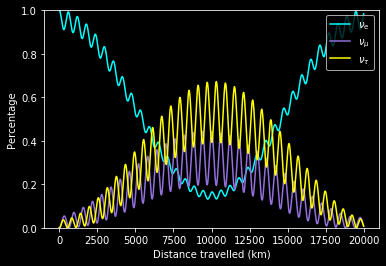

In [9]:
percentages1(row_num = 1, m_21 = 7.42e-5, m_31 = 2.514e-3, E = 0.6 , Length = 20000)

### Probing the Probabilities/Percentages when setting $\delta_{cp} = 0$

In [92]:
delta_cp_0 = 0

PMNS_matrix_alt = np.array([[c_12*c_13, s_12*c_13 , s_13*np.exp(-1j*delta_cp_0)],
[(-s_12*c_23) - (c_12*s_23*s_13*(np.exp(1j*delta_cp_0))),(c_12*c_23) - s_12*s_23*s_13*np.exp(1j*delta_cp_0), s_23*c_13],
[(s_12*s_23) - (c_12*c_23*s_13*np.exp(1j*delta_cp_0)), (-c_12*s_23) - s_12*c_23*s_13*np.exp(1j*delta_cp_0), c_23*c_13]])

print(PMNS_matrix_alt)
print('\n')
print(np.exp(1j*delta_cp_0))

[[ 0.82514619+0.j  0.54491056+0.j  0.14901761+0.j]
 [-0.45537808+0.j  0.48548186+0.j  0.7462829 +0.j]
 [ 0.33431209+0.j -0.68365184+0.j  0.64873383+0.j]]


(1+0j)


In [93]:
import matplotlib.pyplot as plt 
import math

def percentages2(row_num, m_21, m_31, E, Length):
    
    '''
    Args:
        a: A row of the PMNS Matrix (in the form PMNS_matrix[0,:] - i.e calling the PMNS_matrix defined earlier)
        m_21: mass squared difference (21)
        m_31: mass squared difference (31)
        E: Energy of Neutrino 
        L: Distance travelled by neutrino

    '''
    L = np.arange(0,Length,10)
    #L = np.linspace(0, Length, 5000)
    
    def phase_factor2(m_ji,E):
        '''
        args:
            m_ji: Mass squared difference in eV^2
            E = Neutrino Energy in GeV
            L = Distance travelled by neutrino in km
        '''
        L
        return np.exp(-1j*1.27*2*m_ji*L/E) #-i for clockwise rotation, +i for anti-clockwise
    
    rate_21 = phase_factor2(m_21, E) #The amount the v_2 arrow evolves by, with reference to v_1, given E and t
    rate_31 = phase_factor2(m_31, E) 
    
    #print(rate_21)
    #print(rate_31)
    
    def PMNSmatrix(row_num):
        if row_num in [1,2,3]: 
            return PMNS_matrix_alt[row_num - 1,:]
        else:
            print('Please enter either 1,2 or 3. This corresponds to the electron, muon or tau row of the'
              ' PMNS matrix respectively')
            #Fix this to make you return to the top of the loop until a correct input is choosen
    
    a = np.conj(PMNSmatrix(row_num)) #This uses the above function to call the choosen matrix row that we will do work on
    x = a[1]*rate_21
    y = a[2]*rate_31

    
    phases_list_electron=[]
    phases_list_muon=[]
    phases_list_tau=[]
    
    
    for num in [1,2,3]:
        U_bk = PMNSmatrix(num)

        for i in range(len(x)):
            a_new = np.array([[a[0]],[x[i]],[y[i]]])  
            flavour_composition = float((np.absolute(np.dot(U_bk,a_new)))**2)

            if num == 1:
                phases_list_electron.append(flavour_composition)
            elif num == 2:
                phases_list_muon.append(flavour_composition)
            else:
                phases_list_tau.append(flavour_composition)
    
    
     # set limits for axis so we can see the full range of angles
    plt.ylim((0,1))
    plt.plot(L, phases_list_electron, color = 'aqua', lw = 1.5, label = '$\\nu_{\\mathrm{e}}$')
    plt.plot(L, phases_list_muon, color = 'mediumpurple', lw = 1.5, label = '$\\nu_{\\mu}$')
    plt.plot(L, phases_list_tau, color = 'yellow', lw = 1.5, label = '$\\nu_{\\tau}$')
    plt.ylabel('Probability')
    plt.xlabel('Distance travelled (km)')
    plt.style.use('dark_background')
    plt.legend(loc='upper right') 

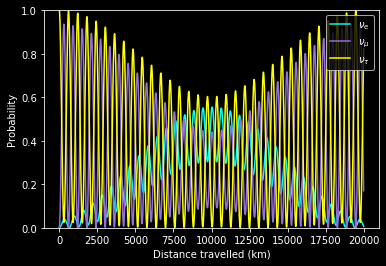

In [94]:
#probing when delta-cp = 0, looking at the differences above where delta-cp = 195 deg
percentages2(row_num = 3, m_21 = 7.42e-5, m_31 = 2.514e-3, E = 0.6 , Length = 20000)

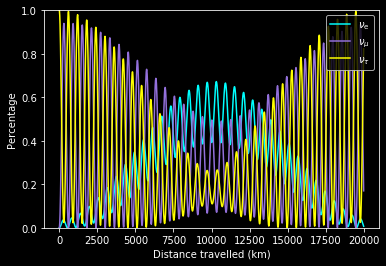

In [95]:
percentages1(row_num = 3, m_21 = 7.42e-5, m_31 = 2.514e-3, E = 0.6 , Length = 20000)

# Extras

### Setting a custom $\delta_{cp}$ and looking at the effect on Neutrino and Anti-Neutrino Probability

In [47]:
delta_cp_deg = 15 #delta_cp in degrees
delta_cp_custom = np.radians(delta_cp_deg) #conversion to radians

PMNS_matrix_custom = np.array([[c_12*c_13, s_12*c_13 , s_13*np.exp(-1j*delta_cp_custom)],
[(-s_12*c_23) - (c_12*s_23*s_13*(np.exp(1j*delta_cp_custom))),(c_12*c_23) - s_12*s_23*s_13*np.exp(1j*delta_cp_custom), s_23*c_13],
[(s_12*s_23) - (c_12*c_23*s_13*np.exp(1j*delta_cp_custom)), (-c_12*s_23) - s_12*c_23*s_13*np.exp(1j*delta_cp_custom), c_23*c_13]])

import matplotlib.pyplot as plt 
import math

def CP(row_num, m_21, m_31, E, Length):
    
    '''
    Args:
        a: A row of the PMNS Matrix (in the form PMNS_matrix[0,:] - i.e calling the PMNS_matrix defined earlier)
        m_21: mass squared difference (21)
        m_31: mass squared difference (31)
        E: Energy of Neutrino 
        L: Distance travelled by neutrino

    '''
    L = np.arange(0,Length,10)
    #L = np.linspace(0, Length, 5000)
    
    def phase_factor(m_ji,E):
        '''
        args:
            m_ji: Mass squared difference in eV^2
            E = Neutrino Energy in GeV
            L = Distance travelled by neutrino in km
        '''
        L
        return np.exp(-1j*1.27*2*m_ji*L/E) #-i for clockwise rotation, +i for anti-clockwise
    
    def phase_factor_anti(m_ji,E):
        '''
        args:
            m_ji: Mass squared difference in eV^2
            E = Neutrino Energy in GeV
            L = Distance travelled by neutrino in km
        '''
        L
        return np.exp(1j*1.27*2*m_ji*L/E) #-i for clockwise rotation, +i for anti-clockwise

    
    rate_21 = phase_factor(m_21, E) #The amount the v_2 arrow evolves by, with reference to v_1, given E and t
    rate_31 = phase_factor(m_31, E) 
    
    rate_21_anti = phase_factor_anti(m_21, E)
    rate_31_anti = phase_factor_anti(m_31, E) 
    
    
    
    def PMNSmatrix(row_num):
        if row_num in [1,2,3]: 
            return PMNS_matrix_custom[row_num - 1,:]
        else:
            print('Please enter either 1,2 or 3. This corresponds to the electron, muon or tau row of the'
              ' PMNS matrix respectively')
       #Fix this to make you return to the top of the loop until a correct input is choosen
    
    
    
    
    a = np.conj(PMNSmatrix(row_num)) #This uses the above function to call the choosen matrix row that we will do work on
    x = a[1]*rate_21
    y = a[2]*rate_31
    
    w = a[1]*rate_21_anti
    z = a[2]*rate_31_anti

    
    percentage_list_electron=[]
    percentage_list_muon=[]
    percentage_list_tau=[]
    
    
    percentage_list_electron_anti=[]
    percentage_list_muon_anti=[]
    percentage_list_tau_anti=[]
    
    for num in [1,2,3]:
        U_bk = PMNSmatrix(num)

        for i in range(len(x)):
            a_new = np.array([[a[0]],[x[i]],[y[i]]]) 
            a_new_anti = np.array([[a[0]],[w[i]],[z[i]]]) 
            flavour_composition = float((np.absolute(np.dot(U_bk,a_new)))**2)
            flavour_composition_anti = float((np.absolute(np.dot(U_bk,a_new_anti)))**2)

            if num == 1:
                percentage_list_electron.append(flavour_composition)
                percentage_list_electron_anti.append(flavour_composition_anti)
            elif num == 2:
                percentage_list_muon.append(flavour_composition)
                percentage_list_muon_anti.append(flavour_composition_anti)
            else:
                percentage_list_tau.append(flavour_composition)
                percentage_list_tau_anti.append(flavour_composition_anti)
    
    
     # set limits for axis so we can see the full range of angles
    plt.ylim((0,0.15))
    plt.plot(L, percentage_list_electron, color = 'aqua', lw = 1.5, label = r'$\nu_e$')
    #plt.plot(L, percentage_list_muon, color = 'mediumpurple', lw = 1.5, label = 'muon percentage')
    #plt.plot(L, percentage_list_tau, color = 'yellow', lw = 1.5, label = 'tau percentage')
    
    plt.plot(L, percentage_list_electron_anti, '--', lw = 1.5, label = r'$\bar{\nu}_e}$')
    #plt.plot(L, percentage_list_muon_anti, color = 'mediumpurple', lw = 1.5, label = 'anti muon percentage')
    #plt.plot(L, percentage_list_tau_anti, color = 'yellow', lw = 1.5, label = 'anti tau percentage')
    
    plt.ylabel('Probability')
    plt.xlabel('Distance travelled (km)')
    plt.style.use('dark_background')
    plt.legend(loc='upper left', fontsize = 15)
    plt.title(r'$\nu_e$ apperance from $\nu_{\mu}$')

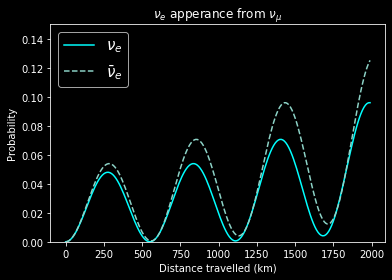

In [48]:
CP(row_num = 2, m_21 = 7.42e-5, m_31 = 2.514e-3, E = 0.6 , Length = 2000)

### Doing the same as above but for multiple values of $\delta_{cp}$

In [19]:
import numpy as np
import matplotlib.pyplot as plt 
import math
def CP_plots(row_num, m_21, m_31, E, Length):
    
    '''
    Args:
        a: A row of the PMNS Matrix (in the form PMNS_matrix[0,:] - i.e calling the PMNS_matrix defined earlier)
        m_21: mass squared difference (21)
        m_31: mass squared difference (31)
        E: Energy of Neutrino 
        L: Distance travelled by neutrino

    '''
    L = np.arange(0,Length,10)
    #L = np.linspace(0, Length, 5000)
    
    def phase_factor(m_ji,E):
        '''
        args:
            m_ji: Mass squared difference in eV^2
            E = Neutrino Energy in GeV
            L = Distance travelled by neutrino in km
        '''
        L
        return np.exp(-1j*1.27*2*m_ji*L/E)  #-i for clockwise rotation, this represents a neutrino
    
    def phase_factor_anti(m_ji,E):
        '''
        args:
            m_ji: Mass squared difference in eV^2
            E = Neutrino Energy in GeV
            L = Distance travelled by neutrino in km
        '''
        L
        return np.exp(1j*1.27*2*m_ji*L/E) #+i for anti-clockwise, this represents an anti neutrino
    
    def PMNSmatrix(cpmatrix,row_num):
        if row_num in [1,2,3]: 
            return Custom_PMNS_Matrices[cpmatrix][row_num - 1,:]
        
    delta_cp_deg = [0,90,195,270] #delta_cp values we want to plot in degrees
    delta_cp_custom = np.radians(delta_cp_deg) #conversion to radians
    Custom_PMNS_Matrices = []
    for i in [0,1,2,3]:
        Custom_PMNS_Matrices.append(np.array([[c_12*c_13, s_12*c_13 , s_13*np.exp(-1j*delta_cp_custom[i])],
        [(-s_12*c_23) - (c_12*s_23*s_13*(np.exp(1j*delta_cp_custom[i]))),(c_12*c_23) - s_12*s_23*s_13*np.exp(1j*delta_cp_custom[i]), s_23*c_13],
        [(s_12*s_23) - (c_12*c_23*s_13*np.exp(1j*delta_cp_custom[i])), (-c_12*s_23) - s_12*c_23*s_13*np.exp(1j*delta_cp_custom[i]), c_23*c_13]]))

    fig = plt.figure(figsize = (16,8))
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
    ax3 = fig.add_subplot(2, 2, 3)
    ax4 = fig.add_subplot(2, 2, 4)
    plt.style.use('dark_background')

    
    rate_21 = phase_factor(m_21, E) 
    rate_31 = phase_factor(m_31, E) 
    
    rate_21_anti = phase_factor_anti(m_21, E)
    rate_31_anti = phase_factor_anti(m_31, E) 
    
    percentage_list_1=[]
    percentage_list_anti_1=[]
    percentage_list_2=[]
    percentage_list_anti_2=[]
    percentage_list_3=[]
    percentage_list_anti_3=[]
    percentage_list_4=[]
    percentage_list_anti_4=[]
    
    for g in [0,1,2,3]: #to access the 1st to 4th different PMNS matrix 
        a = np.conj(PMNSmatrix(g, row_num))   #a = U^*_(alpha)i 
        x = a[1]*rate_21
        y = a[2]*rate_31
        w = a[1]*rate_21_anti
        z = a[2]*rate_31_anti
            
        for num in [1,2,3]:  #num 1 means looking at the electron neutrino probabilities
            U_bk = PMNSmatrix(g,num)

            for i in range(len(x)):
                a_new = (np.array([[a[0]],[x[i]],[y[i]]])) #a_new = U^*_(alpha)i x e^(-i phi)
                a_new_anti = (np.array([[a[0]],[w[i]],[z[i]]])) #a_new_anti = U^*_(alpha)i x e^(+i phi)
                flavour_composition = float((np.absolute(np.dot(U_bk,a_new)))**2)
                flavour_composition_anti = float((np.absolute(np.dot(U_bk,a_new_anti)))**2)
                
                if num == 1 and g == 0:
                    percentage_list_1.append(flavour_composition)
                    percentage_list_anti_1.append(flavour_composition_anti)
                    
                elif num == 1 and g == 1:
                    percentage_list_2.append(flavour_composition)
                    percentage_list_anti_2.append(flavour_composition_anti)
                        
                elif num == 1 and g == 2:
                    percentage_list_3.append(flavour_composition)
                    percentage_list_anti_3.append(flavour_composition_anti)
                        
                elif num == 1 and g == 3:
                    percentage_list_4.append(flavour_composition)
                    percentage_list_anti_4.append(flavour_composition_anti)
            
    #0.15
    ax1.set_ylim((0,0.15))
    ax1.plot(L, percentage_list_1, color = 'aqua', lw = 1.5, label = r'$\nu_{\mu}$ $\rightarrow$$\nu_{\mathrm{e}}$')
    ax1.plot(L, percentage_list_anti_1, '--', lw = 1.5, label = r'$\bar{\nu}_{\mu}$ $\rightarrow$$\bar{\nu}_e}$')
    ax1.set_title('$\delta_{CP}= 0 \u00b0$' , fontsize = 15, weight = 'bold')
    ax1.xaxis.set_visible(False)
    
    
    ax2.set_ylim((0,0.15))
    ax2.plot(L, percentage_list_2, color = 'aqua', lw = 1.5, label = r'$\nu_e$')
    ax2.plot(L, percentage_list_anti_2, '--', lw = 1.5, label = r'$\bar{\nu}_e}$')
    ax2.set_title("$\delta_{CP} = 90 \u00b0$", fontsize = 15, weight = 'bold')
    ax2.xaxis.set_visible(False)
    ax2.yaxis.set_visible(False)
    
    ax3.set_ylim((0,0.15))
    ax3.plot(L, percentage_list_3, color = 'aqua', lw = 1.5, label = r'$\nu_e$')
    ax3.plot(L, percentage_list_anti_3, '--', lw = 1.5, label = r'$\bar{\nu}_e}$')
    ax3.set_title("$\delta_{CP} = 195 \u00b0$", fontsize = 15, weight = 'bold')

    ax4.set_ylim((0,0.15))
    ax4.plot(L, percentage_list_4, color = 'aqua', lw = 1.5, label = r'$\nu_e$')
    ax4.plot(L, percentage_list_anti_4, '--', lw = 1.5, label = r'($\bar{\nu}_{\mu}$) $\rightarrow$$\bar{\nu}_e}$')
    ax4.set_title("$\delta_{CP} = 270 \u00b0$", fontsize = 15, weight = 'bold')
    ax4.yaxis.set_visible(False)
    
    ax1.set_ylabel('Probability', fontsize = 15)
    ax3.set_ylabel('Probability', fontsize = 15)
    ax3.set_xlabel('Distance travelled (km)', fontsize = 15)
    ax4.set_xlabel('Distance travelled (km)', fontsize = 15)
    ax1.legend(loc='upper left', fontsize = 18) 
    
    ax1.text(1500,0.13, r'$E_{\nu}$ = 0.6 GeV', fontsize = 15)
    
    fig.suptitle(r'$\nu_{\mu}$ ($\bar{\nu}_{\mu}$) $\rightarrow$$\nu_{\mathrm{e}}$ ($\bar{\nu}_{\mathrm{e}}$) apperance for various values of $\delta_{CP}$', fontsize = 20)
    
    

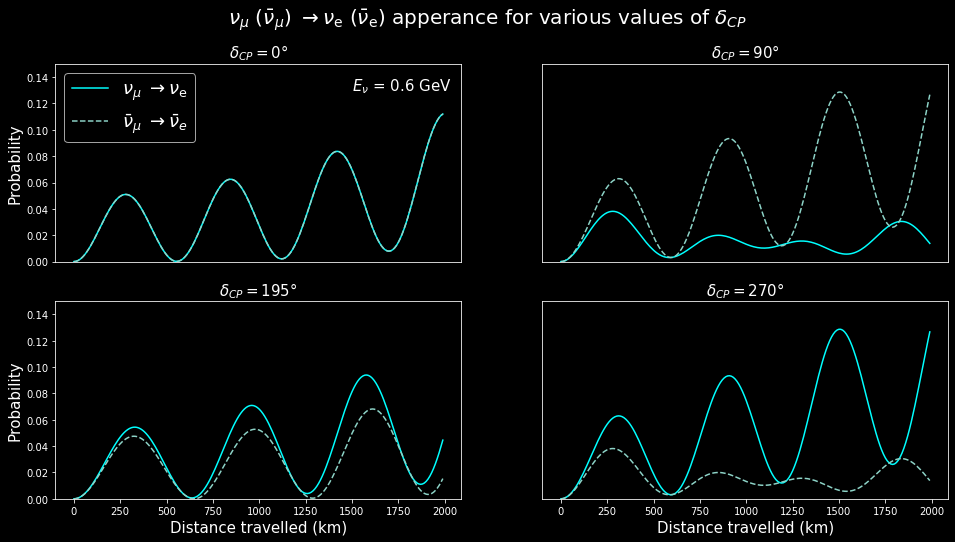

In [20]:
CP_plots(row_num = 2, m_21 = 7.42e-5, m_31 = 2.514e-3, E = 0.6 , Length = 2000)
plt.savefig('CP_term_report.png')